# <center>Método de Lax-Wendroff de Dois Passos</center>
Para equações não lineares, como as equações de escoamento invíscido, pode-se utilizar uma variação de dois passos do método original de Lax-Wendroff. Quando aplicado à equação de onda, esse método explícito de dois passos e três níveis de tempo se torna:

Passo 1:
\begin{equation}
u_{n+1/2, j+1/2} - \frac{{(u_{j+1, n} + u_{n, j})}}{2} \frac{{\Delta t}}{{2 \Delta x}} + c = 0
\tag{4.48}
\end{equation}

Passo 2:
\begin{equation}
u_{j, n+1} - \frac{{u_{n, j}}}{2} + \frac{{(u_{j+1, n+1/2} - u_{n, j+1/2})}}{2} \frac{{\Delta t}}{{\Delta x}} + c = 0 
\tag{4.49}
\end{equation}

Esse esquema é de segunda ordem de precisão, com um erro de truncamento (T.E.) de O(\Delta x^2, \Delta t^2) e é estável sempre que |ν| ≤ 1. O Passo 1 corresponde ao método de Lax aplicado no ponto médio (j+1/2) para meio passo de tempo, enquanto o Passo 2 representa o método leapfrog para a metade restante do passo de tempo.

Quando aplicado à equação de onda linear, o esquema de dois passos de Lax-Wendroff é equivalente ao esquema original de Lax-Wendroff. Isso pode ser facilmente demonstrado substituindo a Equação 4.48 na Equação 4.49. Uma vez que os dois esquemas são equivalentes, segue-se que a equação modificada e o fator de amplificação são os mesmos para ambos os métodos.

# passo 1

\begin{equation}
\frac {u_{j+1/2}^{n+1/2} - (u_{j+1}^n+u_j^n)/2}{\Delta t/2} + c\frac {(u_{j+1}^{n} - u_{j}^n)}{\Delta x} = 0
\end{equation}

\begin{equation}
u_{j+1/2}^{n+1/2} - \frac{u_{j+1}^n+u_j^n}{2} = - \frac{\Delta t}{2} c\frac {(u_{j+1}^{n} - u_{j}^n)}{\Delta x}
\end{equation}

\begin{equation}
u_{j+1/2}^{n+1/2} = - \frac{\Delta t}{2 \Delta x} c(u_{j+1}^{n} - u_{j}^n) + \frac {(u_{j+1}^n+u_j^n)}{2}
\end{equation}

tomando $v = \frac{\Delta t}{\Delta x} c$ temos
 
\begin{equation}
u_{j+1/2}^{n+1/2} = - \frac {v}{2}(u_{j+1}^{n} - u_{j}^n) + \frac {(u_{j+1}^n+u_j^n)}{2}
\end{equation}

# passo 2

\begin{equation}
\frac {u_{j}^{n+1} - u_{j}^{n}}{\Delta t} + c\frac {(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2})}\Delta x = 0
\end{equation}
    
\begin{equation}
\frac {u_{j}^{n+1} - u_{j}^{n}}{\Delta t} = - c\frac {(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2})}{\Delta x}
\end{equation}

\begin{equation}
u_{j}^{n+1} - u_{j}^{n} = - \frac{\Delta t}{\Delta x}c(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2})
\end{equation}
    
\begin{equation}
u_{j}^{n+1} - u_{j}^{n} = - v(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2})
\end{equation}
    
\begin{equation}
u_{j}^{n+1} = - v(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2}) + u_{j}^{n}
\end{equation}
    
# passo 1:   

\begin{equation}numero1\_virtual = \mathbf{u_{j-1/2}^{n+1/2} = - \frac {v}{2}(u_{j}^{n} - u_{j-1}^n) + \frac {(u_{j}^n+u_{j-1}^n)}{2}}
\end{equation}
    
# passo 1:   

\begin{equation}
numero2\_virtual = \mathbf{u_{j+1/2}^{n+1/2} = - \frac {v}{2}(u_{j+1}^{n} - u_{j}^n) + \frac {(u_{j+1}^n+u_j^n)}{2}}
\end{equation}
    
# passo 2

\begin{equation}
\mathbf{u_{j}^{n+1} = - v(u_{j+1/2}^{n+1/2} - u_{j-1/2}^{n+1/2}) + u_{j}^{n}}
\end{equation}

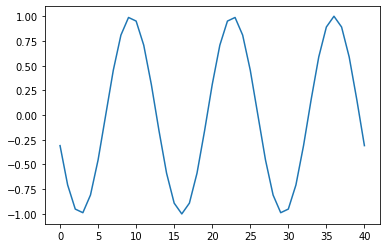

In [1]:
# Método de Lax-Wendroff de Dois Passos

import numpy as np
import matplotlib.pyplot as plt

l = 40
delta_x = 1
num_pontos = int(l / delta_x) + 1
t_final = 18
c = 1
delta_t = 1
a2 = int(t_final / delta_t)
num_tempo = a2 + 1
n = 3
v = c * delta_t / delta_x

x = np.arange(0, l+delta_x, delta_x)
#x = np.linspace(0,l+delta_x,delta_x)

num_pontos2 = num_pontos + 2

u_num = np.zeros((num_tempo, num_pontos2))

u_num[0, 1:num_pontos2 - 1] = np.sin((2 * n * np.pi * x) / l)
u_num[0, 0] = u_num[0, num_pontos2 - 3]
u_num[0, num_pontos2 - 1] = u_num[0, 2]

v = (delta_t / delta_x) * c

for n in range(0, num_tempo - 1):
    for j in range(0, (num_pontos2 - 1)):
        numero1_virtual = -v / 2 * (u_num[n, j] - u_num[n, j - 1]) + (u_num[n, j] + u_num[n, j - 1]) / 2
        numero2_virtual = -v / 2 * (u_num[n, j + 1] - u_num[n, j]) + (u_num[n, j + 1] + u_num[n, j]) / 2

        u_num[n + 1, j] = -v * (numero2_virtual - numero1_virtual) + u_num[n, j]

        u_num[n, 0] = u_num[n, num_pontos2 - 3]
        u_num[n, num_pontos2 - 1] = u_num[n, 2]

plt.plot(x,u_num[6,1:-1]);